In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif


In [18]:
data = pd.read_csv('dengue_sinan.csv', low_memory=False)

In [19]:
data

,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,...,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H,CS_FLXRET,FLXRECEBI,IDENT_MICR,MIGRADO_W,ID_CNS_SUS_HASHED
0,0000158,2.0,A90,2016-03-05,201609.0,2016.0,29.0,292210.0,1381.0,2498731.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
1,0000298,2.0,A90,2016-02-15,201607.0,2016.0,29.0,293290.0,1385.0,3280969.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,ebc774c2fc9be73f8d403772dc14539dbe6e448e117f62...
2,0005082,2.0,A90,2016-03-25,201612.0,2016.0,29.0,293250.0,1385.0,2800527.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,e0f037bc45eeea73df919230256055724a0bc45b990d62...
3,0111262,2.0,A90,2016-03-24,201612.0,2016.0,29.0,291360.0,1385.0,2706628.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
4,0000166,2.0,A90,2016-03-13,201611.0,2016.0,29.0,292210.0,1381.0,2498731.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,595d3ab2cc2bfc76ee1e9ef090ac6abf0e7b64aee90e92...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620207,0001257,2.0,A90,2024-03-04,202410.0,2024.0,29.0,291980.0,1398.0,7175973.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,5152560db10a8bc76f1490909a74620605b6f3b512e8d7...
620208,0372024,2.0,A90,2024-01-26,202404.0,2024.0,29.0,292303.0,1381.0,6540007.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,d7c7bebe87009f4f9e4a606f6fe2ddc83a67ea3c48ada8...
620209,0000128,2.0,A90,2024-02-19,202408.0,2024.0,29.0,291400.0,1381.0,2824558.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
620210,0002257,2.0,A90,2024-03-26,202413.0,2024.0,29.0,291980.0,1398.0,7175973.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,39ff9aa9be21447bbb7d02b8a4b51bf4f1f9da1607ad75...


##### Padronizar a coluna alvo

In [20]:
def classificar(numero):
    if numero in [10, 11, 12]:
        return '1'
    else:
        return '0'

data['CLASSI_FIN'] = data['CLASSI_FIN'].apply(classificar)

##### Tratar dados, verificar e remover quaisquer valores ausentes nas features

In [34]:
data = data.dropna(subset=[
    'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'NAUSEA', 'VOMITO',
    'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA',
    'LACO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'DOR_RETRO',  'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE'
])

In [35]:
colunas = [
    'CLASSI_FIN', 'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'NAUSEA', 'VOMITO',
    'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA',
    'LACO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'DOR_RETRO', 'RENAL', 'HIPERTENSA', 
    'ACIDO_PEPT', 'AUTO_IMUNE'
]

base_dengue = data.filter(items=colunas)

In [36]:
base_dengue = base_dengue.astype(int)

In [37]:
correlacao_numerica = base_dengue.select_dtypes('number').corr()
correlacao_numerica

,CLASSI_FIN,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,NAUSEA,VOMITO,DOR_COSTAS,CONJUNTVIT,ARTRITE,...,LEUCOPENIA,LACO,DIABETES,HEMATOLOG,HEPATOPAT,DOR_RETRO,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE
CLASSI_FIN,1.000000,-0.024944,-0.024275,-0.011950,-0.041623,-0.020316,-0.009646,0.030825,0.013260,0.028813,...,-0.040545,-0.021707,0.023930,0.010407,0.011172,-0.036223,0.009946,0.029497,0.013950,0.008650
FEBRE,-0.024944,1.000000,0.182181,0.202307,0.071177,0.062638,0.062342,0.069674,0.031410,0.040636,...,0.028185,0.019450,-0.007800,0.006620,0.004791,0.080122,0.002222,-0.010008,0.005418,0.004447
MIALGIA,-0.024275,0.182181,1.000000,0.261415,0.049097,0.097838,-0.008713,0.111027,0.040471,0.087190,...,0.018249,0.021786,0.025914,0.008238,0.006687,0.146096,0.006515,0.048011,0.007810,0.010563
CEFALEIA,-0.011950,0.202307,0.261415,1.000000,0.013262,0.160095,0.054342,0.174747,0.049110,0.080556,...,0.004423,0.021804,0.004812,0.005248,0.005384,0.172912,0.002859,0.021833,0.007605,0.009129
EXANTEMA,-0.041623,0.071177,0.049097,0.013262,1.000000,0.080202,0.048762,0.076460,0.100193,0.106860,...,0.063818,0.069905,0.004401,0.012450,0.010220,0.061197,0.013358,0.009649,0.011603,0.016162
NAUSEA,-0.020316,0.062638,0.097838,0.160095,0.080202,1.000000,0.335031,0.259981,0.106589,0.145322,...,0.058982,0.044811,0.029870,0.016412,0.018719,0.150200,0.020697,0.058806,0.018743,0.020351
VOMITO,-0.009646,0.062342,-0.008713,0.054342,0.048762,0.335031,1.000000,0.086845,0.054569,0.043221,...,0.045438,0.031257,0.010311,0.014209,0.015269,0.010974,0.018563,0.010192,0.013434,0.011800
DOR_COSTAS,0.030825,0.069674,0.111027,0.174747,0.076460,0.259981,0.086845,1.000000,0.169965,0.285837,...,0.045176,0.073184,0.063710,0.022667,0.021798,0.200511,0.026153,0.109640,0.019667,0.025449
CONJUNTVIT,0.013260,0.031410,0.040471,0.049110,0.100193,0.106589,0.054569,0.169965,1.000000,0.193538,...,0.075223,0.083054,0.030663,0.042676,0.038305,0.083400,0.038861,0.042582,0.038557,0.037679
ARTRITE,0.028813,0.040636,0.087190,0.080556,0.106860,0.145322,0.043221,0.285837,0.193538,1.000000,...,0.075813,0.077354,0.058644,0.033664,0.033016,0.130758,0.029430,0.091663,0.033819,0.032668


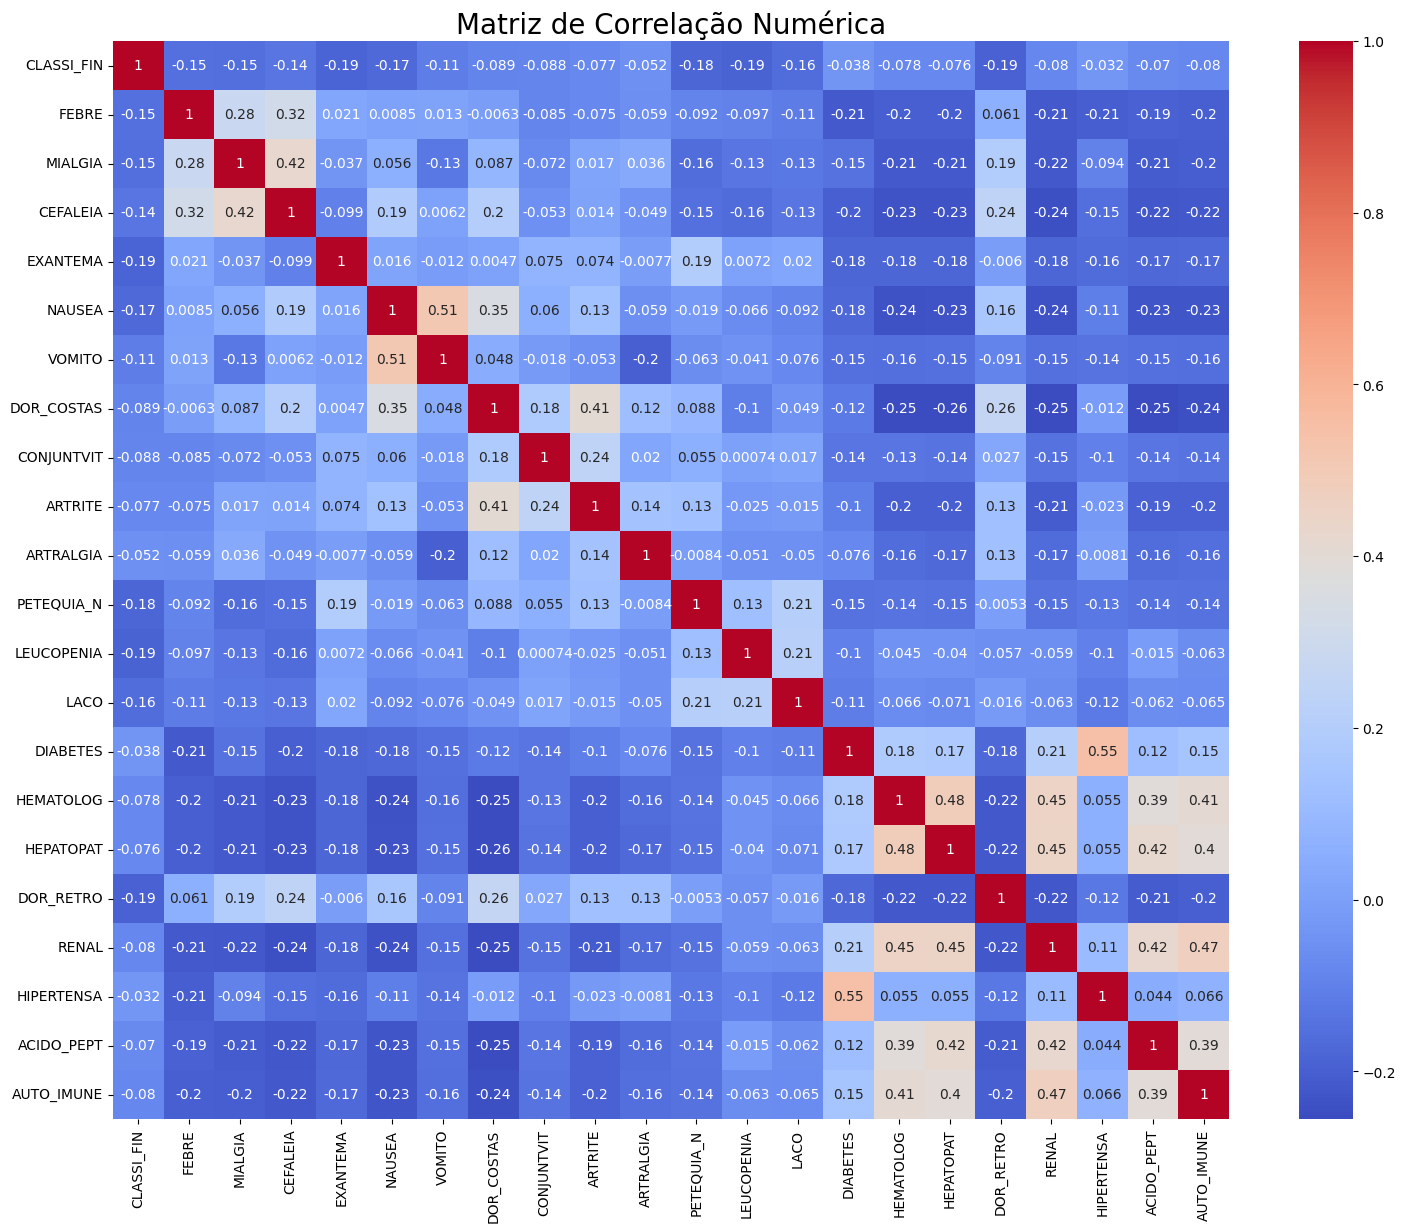

In [38]:
correlation_matrix = correlacao_numerica.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação Numérica", fontsize = 20)
plt.show()

In [39]:
relevant_columns = [
    'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'NAUSEA', 'VOMITO',
    'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA',
    'LACO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'DOR_RETRO', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE'
]

target_column = 'CLASSI_FIN' 

data_filtered = base_dengue[relevant_columns + [target_column]]
data_filtered = data_filtered.dropna(subset=[target_column])

X = data_filtered.drop(target_column, axis=1)
y = data_filtered[target_column]


##### Codificar variáveis categóricas

In [44]:
categorical_features = [col for col in relevant_columns if data[col].dtype == 'object']
numerical_features = [col for col in relevant_columns if data[col].dtype != 'object']

##### Modelo de regressão logistica

In [45]:
# Pipeline de pré-processamento e seleção de features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Incorporar a seleção de recursos no pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif, k='all')),
    ('classifier', LogisticRegression(solver='lbfgs', penalty='l2', max_iter=100))
])

# Dividir os dados
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Treinar o modelo
pipeline.fit(X_train, y_train)

# Prever no conjunto de validação
y_val_pred = pipeline.predict(X_val)

# Calcular métricas
precision = precision_score(y_val, y_val_pred, average='binary', pos_label=1)
recall = recall_score(y_val, y_val_pred, average='binary', pos_label=1)
f1 = f1_score(y_val, y_val_pred, average='binary', pos_label=1)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Relatório completo
print(classification_report(y_val, y_val_pred, target_names=['0', '1']))

# Seleção de features
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)
scores = selector.scores_

# Exibir a importância das features
feature_scores = pd.DataFrame({'Feature': X_train.columns, 'Score': scores})
print(feature_scores.sort_values(by='Score', ascending=False))

Precision: 0.58
Recall: 0.06
F1-score: 0.10
              precision    recall  f1-score   support

           0       0.61      0.97      0.75     48645
           1       0.58      0.06      0.10     32474

    accuracy                           0.61     81119
   macro avg       0.59      0.51      0.42     81119
weighted avg       0.60      0.61      0.49     81119

       Feature       Score
3     EXANTEMA  685.572250
11  LEUCOPENIA  575.441049
16   DOR_RETRO  529.501798
10  PETEQUIA_N  458.327625
6   DOR_COSTAS  356.032464
8      ARTRITE  343.936939
18  HIPERTENSA  343.173550
0        FEBRE  239.916007
1      MIALGIA  223.214951
13    DIABETES  216.116464
12        LACO  177.305108
9    ARTRALGIA  174.170524
4       NAUSEA  128.313642
19  ACIDO_PEPT   73.019734
7   CONJUNTVIT   66.478704
17       RENAL   60.955265
2     CEFALEIA   60.809542
14   HEMATOLOG   51.287053
15   HEPATOPAT   46.080165
20  AUTO_IMUNE   35.861370
5       VOMITO   33.284397


##### Modelo K-Nearest Neighbors (KNN)

In [46]:
# Pipeline de pré-processamento e seleção de features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Incorporar a seleção de recursos no pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif, k='all')),
    ('classifier', KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='uniform'))
])

# Dividir os dados
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Treinar o modelo
pipeline.fit(X_train, y_train)

# Prever no conjunto de validação
y_val_pred = pipeline.predict(X_val)

# Calcular métricas
precision = precision_score(y_val, y_val_pred, average='binary', pos_label=1)
recall = recall_score(y_val, y_val_pred, average='binary', pos_label=1)
f1 = f1_score(y_val, y_val_pred, average='binary', pos_label=1)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Relatório completo
print(classification_report(y_val, y_val_pred, target_names=['0', '1']))

# Seleção de features
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)
scores = selector.scores_

# Exibir a importância das features
feature_scores = pd.DataFrame({'Feature': X_train.columns, 'Score': scores})
print(feature_scores.sort_values(by='Score', ascending=False))

Precision: 0.43
Recall: 0.33
F1-score: 0.37
              precision    recall  f1-score   support

           0       0.61      0.71      0.66     48645
           1       0.43      0.33      0.37     32474

    accuracy                           0.56     81119
   macro avg       0.52      0.52      0.52     81119
weighted avg       0.54      0.56      0.55     81119

       Feature       Score
3     EXANTEMA  685.572250
11  LEUCOPENIA  575.441049
16   DOR_RETRO  529.501798
10  PETEQUIA_N  458.327625
6   DOR_COSTAS  356.032464
8      ARTRITE  343.936939
18  HIPERTENSA  343.173550
0        FEBRE  239.916007
1      MIALGIA  223.214951
13    DIABETES  216.116464
12        LACO  177.305108
9    ARTRALGIA  174.170524
4       NAUSEA  128.313642
19  ACIDO_PEPT   73.019734
7   CONJUNTVIT   66.478704
17       RENAL   60.955265
2     CEFALEIA   60.809542
14   HEMATOLOG   51.287053
15   HEPATOPAT   46.080165
20  AUTO_IMUNE   35.861370
5       VOMITO   33.284397


##### Modelo Random Forest

In [47]:
# Pipeline de pré-processamento e seleção de features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Incorporar a seleção de recursos no pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif, k='all')),
    ('classifier', RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42))
])

# Dividir os dados
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Treinar o modelo
pipeline.fit(X_train, y_train)

# Prever no conjunto de validação
y_val_pred = pipeline.predict(X_val)

# Calcular métricas
precision = precision_score(y_val, y_val_pred, average='binary', pos_label=1)
recall = recall_score(y_val, y_val_pred, average='binary', pos_label=1)
f1 = f1_score(y_val, y_val_pred, average='binary', pos_label=1)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Relatório completo
print(classification_report(y_val, y_val_pred, target_names=['0', '1']))

# Seleção de features
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)
scores = selector.scores_

# Exibir a importância das features
feature_scores = pd.DataFrame({'Feature': X_train.columns, 'Score': scores})
print(feature_scores.sort_values(by='Score', ascending=False))

Precision: 0.52
Recall: 0.18
F1-score: 0.27
              precision    recall  f1-score   support

           0       0.62      0.88      0.73     48645
           1       0.52      0.18      0.27     32474

    accuracy                           0.60     81119
   macro avg       0.57      0.53      0.50     81119
weighted avg       0.58      0.60      0.55     81119

       Feature       Score
3     EXANTEMA  685.572250
11  LEUCOPENIA  575.441049
16   DOR_RETRO  529.501798
10  PETEQUIA_N  458.327625
6   DOR_COSTAS  356.032464
8      ARTRITE  343.936939
18  HIPERTENSA  343.173550
0        FEBRE  239.916007
1      MIALGIA  223.214951
13    DIABETES  216.116464
12        LACO  177.305108
9    ARTRALGIA  174.170524
4       NAUSEA  128.313642
19  ACIDO_PEPT   73.019734
7   CONJUNTVIT   66.478704
17       RENAL   60.955265
2     CEFALEIA   60.809542
14   HEMATOLOG   51.287053
15   HEPATOPAT   46.080165
20  AUTO_IMUNE   35.861370
5       VOMITO   33.284397
